In [1]:
from pathlib import Path
import polars as pl
from farcaster_sybil_detection.config.defaults import Config
from farcaster_sybil_detection.features.manager import FeatureManager
from farcaster_sybil_detection.services.detector import DetectorService

pl.Config.set_streaming_chunk_size(1_000_000)
pl.Config.set_fmt_str_lengths(50)


# Create configuration
config = Config(
    data_path=Path("data"),
    checkpoint_dir=Path("checkpoints"),
    model_dir=Path("models"),
    debug_mode=True,
    cache_enabled=True
)

# Initialize Feature Manager
feature_manager = FeatureManager(config)

# Initialize Detector Service with the Feature Manager
detector = DetectorService(config, feature_manager)

# Load Labels
labels_df = pl.read_csv("data/labels.csv")

# Validate labels_df
required_columns = {'fid', 'bot'}
if not required_columns.issubset(labels_df.columns):
    missing = required_columns - set(labels_df.columns)
    raise ValueError(f"Missing required columns in labels.csv: {missing}")

/Users/joseribeiro/Library/Caches/pypoetry/virtualenvs/farcaster-social-graph-notebooks-RMjVf8-3-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-09 20:37:19,117 - DetectorService - INFO - Loading existing model from checkpoint.


In [2]:
metrics = detector.trainer.train(labels_df)
print("Training Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.3f}")

2024-12-09 20:37:19,777 - Trainer - INFO - Building feature matrix...
2024-12-09 20:37:19,780 - Trainer - INFO - Preparing features for 5248 labeled fids
2024-12-09 20:37:19,780 - FeatureManager - INFO - Starting feature matrix build - Memory usage: 425.94 MB
2024-12-09 20:37:19,781 - FeatureManager - INFO - Base FIDs: 5248
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  f"Feature matrix schema: {feature_matrix.schema} ({len(feature_matrix.columns)} columns)"
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use 

[LightGBM] [Warning] feature_fraction is set=0.6690159176748575, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6690159176748575
[LightGBM] [Warning] bagging_fraction is set=0.7360186382006612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7360186382006612
[LightGBM] [Warning] feature_fraction is set=0.6690159176748575, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6690159176748575
[LightGBM] [Warning] bagging_fraction is set=0.7360186382006612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7360186382006612
[LightGBM] [Info] Number of positive: 3769, number of negative: 429
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14504
[LightGBM] [Info] Number of data points in the train set: 4198, number of used features: 90
[LightGBM] [Info] [binary:BoostFromScore]

2024-12-09 20:44:33,463 - OptimizedEnsemble - INFO - lgbm best score: 0.9984


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

2024-12-09 20:45:40,885 - OptimizedEnsemble - INFO - 
Cross-validation Stability Metrics:
2024-12-09 20:45:40,885 - OptimizedEnsemble - INFO - mean_prediction_variance: 0.0000
2024-12-09 20:45:40,885 - OptimizedEnsemble - INFO - max_prediction_variance: 0.0000
2024-12-09 20:45:40,886 - OptimizedEnsemble - INFO - mean_prediction_range: 0.0000
2024-12-09 20:45:40,886 - OptimizedEnsemble - INFO - max_prediction_range: 0.0000
2024-12-09 20:45:40,886 - OptimizedEnsemble - INFO - stable_prediction_percentage: 1.0000
2024-12-09 20:45:40,887 - OptimizedEnsemble - INFO - Optimizing ensemble weights...
2024-12-09 20:45:41,413 - OptimizedEnsemble - INFO - Optimized weights: [0.25 0.25 0.25 0.25]
2024-12-09 20:45:56,547 - OptimizedEnsemble - INFO - Number of unstable predictions: 0
2024-12-09 20:45:57,107 - Trainer - INFO - 
Evaluation metrics:
2024-12-09 20:45:57,107 - Trainer - INFO - roc_auc: 0.996
2024-12-09 20:45:57,107 - Trainer - INFO - precision: 0.989
2024-12-09 20:45:57,107 - Trainer - I

Training Metrics:
roc_auc: 0.996
precision: 0.989
recall: 0.985
f1: 0.987
mcc: 0.877
kappa: 0.877
tn: 97.000
fp: 10.000
fn: 14.000
tp: 929.000


In [16]:
# result = detector.predict(identifier='rpunkt')
# result = detector.predict(identifier='vitalik')
result = detector.predict(identifier='ipungkribo')
print("\nPrediction Result:")
print(result)

2024-12-09 21:02:00,850 - DetectorService - INFO - Making prediction for identifier: ipungkribo
2024-12-09 21:02:00,851 - Predictor - INFO - Predicting for identifier: ipungkribo
2024-12-09 21:02:00,934 - FeatureManager - INFO - Starting feature matrix build - Memory usage: 7393.19 MB
2024-12-09 21:02:00,935 - FeatureManager - INFO - Base FIDs: 1
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  f"Feature matrix schema: {feature_matrix.schema} ({len(feature_matrix.columns)} columns)"
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially ex

shape: (1, 113)
┌────────┬─────────┬─────────┬────────────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ fid    ┆ has_ens ┆ has_bio ┆ has_avatar ┆ … ┆ thread_part ┆ content_or ┆ vocabulary ┆ hashtag_us │
│ ---    ┆ ---     ┆ ---     ┆ ---        ┆   ┆ icipation   ┆ iginality  ┆ _richness  ┆ age        │
│ i64    ┆ i64     ┆ i64     ┆ i64        ┆   ┆ ---         ┆ ---        ┆ ---        ┆ ---        │
│        ┆         ┆         ┆            ┆   ┆ f64         ┆ f64        ┆ f64        ┆ f64        │
╞════════╪═════════╪═════════╪════════════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 452622 ┆ 0       ┆ 1       ┆ 1          ┆ … ┆ 1.0         ┆ 0.730435   ┆ 4.6        ┆ 0.06087    │
└────────┴─────────┴─────────┴────────────┴───┴─────────────┴────────────┴────────────┴────────────┘

Prediction Result:
{'prediction': 0, 'probability': 0.17806648141469988, 'confidence': 0.6805804934744513, 'prediction_label': 'human', 'features_used': ['has_ens', 'has_bio',

In [19]:
def analyze_population_distribution(detector: DetectorService, feature_matrix: pl.DataFrame):
    """Analyze bot probability distribution across the entire population"""
    print("\nAnalyzing full population distribution...")
    
    try:
        # Get all features (excluding fid)
        feature_cols = [col for col in detector.model.feature_names if col != 'fid']
        X = feature_matrix.select(feature_cols).to_numpy()

        # Replace inf values with nan
        X = np.where(np.isinf(X), np.nan, X)
        
        # Replace nan with 0 and clip extreme values
        X = np.nan_to_num(X, nan=0.0)
        X = np.clip(X, -1e9, 1e9)
        
        # Convert to float32 safely
        X = X.astype(np.float32)
        
        # Get predictions and probabilities
        y_prob = detector.model.predict_proba(X)
        # Take only the probability for class 1 (bot)
        bot_probabilities = y_prob[:, 1]
        y_pred = (bot_probabilities >= 0.5).astype(int)

        fids = feature_matrix['fid'].to_list()
        
        # Create results DataFrame - now using only bot probabilities
        results_df = pl.DataFrame({
            'fid': fids,
            'bot_probability': bot_probabilities,
            'prediction': y_pred
        })
        
        # Calculate distribution statistics
        stats = {
            'total_users': len(results_df),
            'predicted_bots': (y_pred == 1).sum(),
            'predicted_humans': (y_pred == 0).sum(),
            'bot_ratio': (y_pred == 1).mean(),
            'avg_probability': bot_probabilities.mean(),
            'median_probability': np.median(bot_probabilities),
            'std_probability': np.std(bot_probabilities)
        }
        
        # Calculate probability buckets
        bucket_edges = np.arange(0, 1.1, 0.1)
        hist, _ = np.histogram(bot_probabilities, bins=bucket_edges)
        bucket_stats = {f"{bucket_edges[i]:.1f}-{bucket_edges[i+1]:.1f}": count 
                       for i, count in enumerate(hist)}
        
        # Print distribution analysis
        print("\nPopulation Distribution Analysis")
        print("=" * 50)
        print(f"Total Users: {stats['total_users']:,}")
        print(f"Predicted Bots: {stats['predicted_bots']:,} ({stats['bot_ratio']:.1%})")
        print(f"Predicted Humans: {stats['predicted_humans']:,} ({1-stats['bot_ratio']:.1%})")
        print("\nProbability Statistics:")
        print(f"Mean Bot Probability: {stats['avg_probability']:.3f}")
        print(f"Median Bot Probability: {stats['median_probability']:.3f}")
        print(f"Std Dev: {stats['std_probability']:.3f}")
        
        print("\nProbability Distribution:")
        for bucket, count in bucket_stats.items():
            print(f"{bucket}: {count:,} users ({count/stats['total_users']:.1%})")
        
        # Plot distribution
        import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 6))
        plt.hist(bot_probabilities, bins=50, density=True, alpha=0.7)
        plt.axvline(x=0.5, color='r', linestyle='--', label='Decision Boundary')
        plt.xlabel('Bot Probability')
        plt.ylabel('Density')
        plt.title('Distribution of Bot Probabilities')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()

        # Save results
        results_df = results_df.sort('bot_probability', descending=True)
        results_df.write_csv("population_analysis.csv")
        print("\nResults saved to population_analysis.csv")
        
        return {
            'results_df': results_df,
            'stats': stats,
            'bucket_stats': bucket_stats
        }
        
    except Exception as e:
        print(f"Error in population analysis: {str(e)}")
        raise

In [24]:
# First, get all available FIDs from the profile dataset
profiles_df = feature_manager.data_loader.load_dataset(
    'profile_with_addresses', 
    columns=['fid', 'fname']
)
all_fids = profiles_df['fid'].unique().sort()
print(f"Total population size: {len(all_fids)} FIDs")

2024-12-09 21:03:45,625 - DatasetLoader - INFO - Loading profile_with_addresses with columns: ['fid', 'fname']
2024-12-09 21:03:45,641 - DatasetLoader - INFO - Filtered dataset: 894048 records, 893130 unique FIDs
2024-12-09 21:03:45,654 - DatasetLoader - INFO - Loaded farcaster-profile_with_addresses: 894048 records


Total population size: 893130 FIDs


In [25]:
# Build feature matrix for all FIDs
print("Building feature matrix for full population...")
full_matrix = feature_manager.build_feature_matrix()
print(f"Feature matrix shape: {full_matrix.shape}")

2024-12-09 21:03:46,228 - FeatureManager - INFO - Starting feature matrix build - Memory usage: 8418.39 MB
2024-12-09 21:03:46,229 - DatasetLoader - INFO - Loading profile_with_addresses with columns: ['fid']
2024-12-09 21:03:46,238 - DatasetLoader - INFO - Filtered dataset: 894048 records, 893130 unique FIDs
2024-12-09 21:03:46,244 - FeatureManager - INFO - Base FIDs: 199963
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  f"Feature matrix schema: {feature_matrix.schema} ({len(feature_matrix.columns)} columns)"
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its sch

Building feature matrix for full population...
Feature matrix shape: (199963, 113)


In [26]:
full_matrix.describe()

statistic,fid,has_ens,has_bio,has_avatar,has_display_name,profile_completeness,display_name_length,bio_length,fname_random_numbers,fname_wallet_pattern,fname_excessive_symbols,fname_airdrop_terms,fname_has_year,bio_random_numbers,bio_wallet_pattern,bio_excessive_symbols,bio_airdrop_terms,bio_has_year,fname_entropy,bio_entropy,total_verifications,eth_verifications,verification_consistency,platforms_verified,verification_span_days,avg_hours_between_verifications,platform_diversity,verification_velocity,sequential_verifications,verification_gaps,storage_units,storage_utilization,storage_update_frequency,storage_growth_rate,storage_stability,storage_efficiency,…,follow_reciprocity,network_density,network_reach,power_user_interaction_rate,power_user_engagement,power_user_influence,power_user_reciprocity,power_user_reach,power_user_alignment,network_churn_rate,relationship_longevity,network_volatility,stable_connections,network_centrality,bridge_score,community_embedding,network_diversity,cast_count,reply_count,mention_count,avg_cast_length,link_usage_rate,content_type_diversity,content_complexity,total_reactions,like_count,recast_count,engagement_rate,viral_coefficient,audience_reach,engagement_consistency,conversation_depth,conversation_initiation_rate,thread_participation,content_originality,vocabulary_richness,hashtag_usage
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,…,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0,199963.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",108066.518356,0.003496,0.147757,0.149493,0.151888,0.111203,1.24556,5.446258,0.009237,0.0,0.000015,0.000015,0.00018,0.00236,0.000075,0.0016,0.001745,0.00093,0.797612,0.763726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.237107,0.237529,0.177878,-0.000173,0.000488,0.174919,…,0.046804,0.046804,10.37605,0.00003,0.000028,0.000032,0.007246,4.210779,NaN,0.0,-47.377523,40.678798,0.001495,29.595105,1.194476,0.137896,14.797553,7.958047,5.073894,0.071518,5.280294,0.010017,0.058126,0.0,22.682676,20.24341,2.439266,0.117247,0.008335,0.046536,0.4275,2.56422,0.04602,0.077089,0.073127,0.739393,0.010017
"""std""",60218.319972,0.059021,0.35486,0.356574,0.358913,0.266164,3.387419,19.229897,0.095663,0.0,0.003873,0.003873,0.013416,0.048527,0.008661,0.039972,0.041741,0.030485,1.98924,4.268361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.552035,0.553257,0.396308,0.012147,0.018704,0.379708,…,0.211219,0.211219,97.281159,0.001383,0.001601,0.000949,0.833245,71.506952,NaN,0.0,128.590239,229.400643,0.286301,196.798174,10.419428,0.344791,98.399087,152.530189,125.442783,5.554472,24.308985,0.073831,0.203571,0.0,517.446786,451.455147,107.121685,1.498254,0.050002,0.420145,1.542894,62.35088,0.183491,0.266734,0.255035,2.558347,0.073831
"""min""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0


Analyzing full population distribution...

Population Distribution Analysis
Total Users: 199,963
Predicted Bots: 188,522 (94.3%)
Predicted Humans: 11,441 (5.7%)

Probability Statistics:
Mean Bot Probability: 0.866
Median Bot Probability: 0.923
Std Dev: 0.168

Probability Distribution:
0.0-0.1: 0 users (0.0%)
0.1-0.2: 6,997 users (3.5%)
0.2-0.3: 743 users (0.4%)
0.3-0.4: 1,427 users (0.7%)
0.4-0.5: 2,274 users (1.1%)
0.5-0.6: 1,545 users (0.8%)
0.6-0.7: 7,758 users (3.9%)
0.7-0.8: 4,375 users (2.2%)
0.8-0.9: 3,064 users (1.5%)
0.9-1.0: 171,780 users (85.9%)


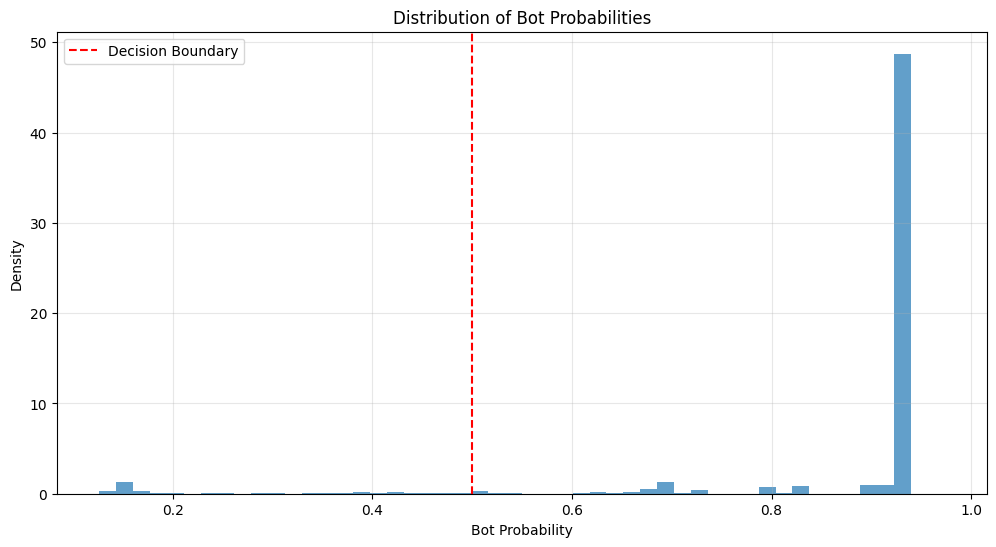


Results saved to population_analysis.csv

High Confidence Bots (>80%): 174844
High Confidence Humans (<20%): 6997
Uncertain Predictions (40-60%): 3819


In [27]:
# Run the analysis
population_analysis = analyze_population_distribution(detector, matrix)

# If you want to examine specific probability ranges:
results_df = population_analysis['results_df']

# High confidence bots (e.g., >90% probability)
high_conf_bots = results_df.filter(pl.col('bot_probability') > 0.8)
print(f"\nHigh Confidence Bots (>80%): {len(high_conf_bots)}")

# High confidence humans (e.g., <10% probability)
high_conf_humans = results_df.filter(pl.col('bot_probability') < 0.2)
print(f"High Confidence Humans (<20%): {len(high_conf_humans)}")

# Uncertain predictions (e.g., 40-60% probability)
uncertain = results_df.filter(
    (pl.col('bot_probability') >= 0.4) & 
    (pl.col('bot_probability') <= 0.6)
)
print(f"Uncertain Predictions (40-60%): {len(uncertain)}")

In [32]:
full_results = results_df.join(profiles_df, on='fid').join(matrix, on='fid')
full_results.head()

fid,bot_probability,prediction,fname,has_ens,has_bio,has_avatar,has_display_name,profile_completeness,display_name_length,bio_length,fname_random_numbers,fname_wallet_pattern,fname_excessive_symbols,fname_airdrop_terms,fname_has_year,bio_random_numbers,bio_wallet_pattern,bio_excessive_symbols,bio_airdrop_terms,bio_has_year,fname_entropy,bio_entropy,total_verifications,eth_verifications,verification_consistency,platforms_verified,verification_span_days,avg_hours_between_verifications,platform_diversity,verification_velocity,sequential_verifications,verification_gaps,storage_units,storage_utilization,storage_update_frequency,storage_growth_rate,…,follow_reciprocity,network_density,network_reach,power_user_interaction_rate,power_user_engagement,power_user_influence,power_user_reciprocity,power_user_reach,power_user_alignment,network_churn_rate,relationship_longevity,network_volatility,stable_connections,network_centrality,bridge_score,community_embedding,network_diversity,cast_count,reply_count,mention_count,avg_cast_length,link_usage_rate,content_type_diversity,content_complexity,total_reactions,like_count,recast_count,engagement_rate,viral_coefficient,audience_reach,engagement_consistency,conversation_depth,conversation_initiation_rate,thread_participation,content_originality,vocabulary_richness,hashtag_usage
i64,f64,i64,str,i64,i64,i64,i64,f64,u32,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,u32,u32,f64,u32,i64,f64,u32,f64,u32,u32,f64,i64,u32,f64,…,f64,f64,u32,f64,f64,f64,f64,u32,f64,f64,f64,f64,u32,u32,f64,f64,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
42796,0.923213,1,null,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,…,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42797,0.923213,1,null,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,…,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42798,0.923213,1,null,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,…,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64737,0.923213,1,null,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,…,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80518,0.923213,1,null,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,…,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# get examples of high confidence bots
high_conf_bots_examples = profiles_df.filter(pl.col('fid').is_in(high_conf_bots['fid'])).sort('fid')
high_conf_bots_examples.head(10)

fid,fname
i64,str
55,"""artir"""
76,"""j"""
82,"""gordon"""
84,"""fmc"""
95,"""domleca"""
100,"""jordancooper"""
109,"""tony"""
122,"""nkostov"""
131,"""shea"""


In [29]:
# get examples of high confidence humans
high_conf_humans_examples = profiles_df.filter(pl.col('fid').is_in(high_conf_humans['fid'])).sort('fid')
high_conf_humans_examples.head(10)

fid,fname
i64,str
7,"""kevin"""
8,"""jacob"""
10,"""elad"""
13,"""jimpo"""
20,"""barmstrong"""
24,"""jesse"""
25,"""cdixon.eth"""
26,"""fehrsam"""
27,"""jon"""


In [31]:
population_analysis

{'results_df': shape: (199_963, 3)
 ┌────────┬─────────────────┬────────────┐
 │ fid    ┆ bot_probability ┆ prediction │
 │ ---    ┆ ---             ┆ ---        │
 │ i64    ┆ f64             ┆ i64        │
 ╞════════╪═════════════════╪════════════╡
 │ 196306 ┆ 0.97336         ┆ 1          │
 │ 23524  ┆ 0.966061        ┆ 1          │
 │ 187790 ┆ 0.953313        ┆ 1          │
 │ 191722 ┆ 0.948268        ┆ 1          │
 │ 188252 ┆ 0.944468        ┆ 1          │
 │ …      ┆ …               ┆ …          │
 │ 12855  ┆ 0.127246        ┆ 0          │
 │ 858    ┆ 0.127224        ┆ 0          │
 │ 7357   ┆ 0.127205        ┆ 0          │
 │ 195543 ┆ 0.126416        ┆ 0          │
 │ 77     ┆ 0.126219        ┆ 0          │
 └────────┴─────────────────┴────────────┘,
 'stats': {'total_users': 199963,
  'predicted_bots': np.int64(188522),
  'predicted_humans': np.int64(11441),
  'bot_ratio': np.float64(0.9427844151167966),
  'avg_probability': np.float64(0.8663752189341198),
  'median_probability'

In [37]:
# Function to analyze a prediction in detail
def analyze_prediction(detector, identifier):
    result = detector.predict(identifier)
    
    if result['status'] != 'success':
        print(f"Error: {result['error']}")
        return
    
    print(f"\nAnalysis for {result['fname']} (FID: {result['fid']})")
    print("=" * 50)
    print(f"Prediction: {result['prediction_label']}")
    print(f"Probability of being a bot: {result['probability']:.3f}")
    print(f"Model confidence: {result['confidence']:.3f}")
    
    # Get feature importance
    features = detector.feature_manager.get_features_for_fid(result['fid'])
    feature_importance = detector.model.get_feature_importance()
    
    print("\nTop contributing features:")
    for feature, importance in sorted(feature_importance.items(), 
                                    key=lambda x: abs(x[1]), 
                                    reverse=True)[:10]:
        print(f"{feature}: {importance:.3f}")

In [41]:
def identify_model_problems(detector, identifier):
    result = detector.predict(identifier)
    
    problems = []
    
    # Check probability threshold
    if 0.4 <= result['probability'] <= 0.6:
        problems.append("Uncertain prediction (probability near decision boundary)")
    
    # Check confidence
    if result['confidence'] < 0.7:
        problems.append("Low confidence prediction")
    
    # Check feature completeness
    missing_features = set(detector.model.feature_names) - set(result['features_used'])
    if missing_features:
        problems.append(f"Missing features: {missing_features}")
    
    # Check for extreme feature values
    features = detector.feature_manager.get_features_for_fid(result['fid'])
    for col in features.columns:
        if col != 'fid':
            value = features[col][0]
            if value and abs(value) > 1e6:
                problems.append(f"Extreme value in feature {col}: {value}")
    
    return problems

In [45]:
def evaluate_model_robustness(detector, test_cases):
    results = []
    for case in test_cases:
        pred = detector.predict(case)
        results.append({
            'identifier': case,
            'prediction': pred['prediction_label'],
            'probability': pred['probability'],
            'confidence': pred['confidence'],
            'problems': identify_model_problems(detector, case)
        })
    
    return pl.DataFrame(results)

In [46]:
# Analyze a single prediction
analyze_prediction(detector, 'vitalik')

# Check for problems
problems = identify_model_problems(detector, 'vitalik')
if problems:
    print("\nPotential problems identified:")
    for problem in problems:
        print(f"- {problem}")

# Evaluate multiple cases
test_cases = ['vitalik', 'rpunkt', 'ipungkribo']
evaluation = evaluate_model_robustness(detector, test_cases)

2024-12-09 21:14:28,401 - DetectorService - INFO - Making prediction for identifier: vitalik
2024-12-09 21:14:28,402 - Predictor - INFO - Predicting for identifier: vitalik
2024-12-09 21:14:28,404 - FeatureManager - INFO - Starting feature matrix build - Memory usage: 3302.92 MB
2024-12-09 21:14:28,404 - FeatureManager - INFO - Base FIDs: 1
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  f"Feature matrix schema: {feature_matrix.schema} ({len(feature_matrix.columns)} columns)"
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensiv

shape: (1, 113)
┌───────┬─────────┬─────────┬────────────┬───┬─────────────┬─────────────┬────────────┬────────────┐
│ fid   ┆ has_ens ┆ has_bio ┆ has_avatar ┆ … ┆ thread_part ┆ content_ori ┆ vocabulary ┆ hashtag_us │
│ ---   ┆ ---     ┆ ---     ┆ ---        ┆   ┆ icipation   ┆ ginality    ┆ _richness  ┆ age        │
│ i64   ┆ i64     ┆ i64     ┆ i64        ┆   ┆ ---         ┆ ---         ┆ ---        ┆ ---        │
│       ┆         ┆         ┆            ┆   ┆ f64         ┆ f64         ┆ f64        ┆ f64        │
╞═══════╪═════════╪═════════╪════════════╪═══╪═════════════╪═════════════╪════════════╪════════════╡
│ 22032 ┆ 0       ┆ 1       ┆ 1          ┆ … ┆ 1.0         ┆ 1.0         ┆ 5.166667   ┆ 0.0        │
└───────┴─────────┴─────────┴────────────┴───┴─────────────┴─────────────┴────────────┴────────────┘

Analysis for vitalik (FID: 22032)
Prediction: human
Probability of being a bot: 0.216
Model confidence: 0.645

Top contributing features:
avg_cast_length: 343.691
relationship

2024-12-09 21:14:28,637 - DetectorService - INFO - Prediction completed.
2024-12-09 21:14:28,638 - DetectorService - INFO - Making prediction for identifier: vitalik
2024-12-09 21:14:28,638 - Predictor - INFO - Predicting for identifier: vitalik
2024-12-09 21:14:28,639 - FeatureManager - INFO - Starting feature matrix build - Memory usage: 3303.11 MB
2024-12-09 21:14:28,640 - FeatureManager - INFO - Base FIDs: 1
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  f"Feature matrix schema: {feature_matrix.schema} ({len(feature_matrix.columns)} columns)"
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Determining the column names of a

shape: (1, 113)
┌───────┬─────────┬─────────┬────────────┬───┬─────────────┬─────────────┬────────────┬────────────┐
│ fid   ┆ has_ens ┆ has_bio ┆ has_avatar ┆ … ┆ thread_part ┆ content_ori ┆ vocabulary ┆ hashtag_us │
│ ---   ┆ ---     ┆ ---     ┆ ---        ┆   ┆ icipation   ┆ ginality    ┆ _richness  ┆ age        │
│ i64   ┆ i64     ┆ i64     ┆ i64        ┆   ┆ ---         ┆ ---         ┆ ---        ┆ ---        │
│       ┆         ┆         ┆            ┆   ┆ f64         ┆ f64         ┆ f64        ┆ f64        │
╞═══════╪═════════╪═════════╪════════════╪═══╪═════════════╪═════════════╪════════════╪════════════╡
│ 22032 ┆ 0       ┆ 1       ┆ 1          ┆ … ┆ 1.0         ┆ 1.0         ┆ 5.166667   ┆ 0.0        │
└───────┴─────────┴─────────┴────────────┴───┴─────────────┴─────────────┴────────────┴────────────┘
shape: (1, 113)
┌────────┬─────────┬─────────┬────────────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ fid    ┆ has_ens ┆ has_bio ┆ has_avatar ┆ … ┆ thread_part

2024-12-09 21:14:28,850 - FeatureManager - INFO - Using cached features for content_engagement
2024-12-09 21:14:28,851 - FeatureManager - INFO - Collecting final feature matrix
2024-12-09 21:14:28,852 - FeatureManager - INFO - Feature matrix build completed - Memory usage: 3303.23 MB
2024-12-09 21:14:28,853 - Predictor - INFO - Generating prediction using shape: (1, 113)
┌────────┬─────────┬─────────┬────────────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ fid    ┆ has_ens ┆ has_bio ┆ has_avatar ┆ … ┆ thread_part ┆ content_or ┆ vocabulary ┆ hashtag_us │
│ ---    ┆ ---     ┆ ---     ┆ ---        ┆   ┆ icipation   ┆ iginality  ┆ _richness  ┆ age        │
│ i64    ┆ i64     ┆ i64     ┆ i64        ┆   ┆ ---         ┆ ---        ┆ ---        ┆ ---        │
│        ┆         ┆         ┆            ┆   ┆ f64         ┆ f64        ┆ f64        ┆ f64        │
╞════════╪═════════╪═════════╪════════════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 452622 ┆ 0       ┆

shape: (1, 113)
┌────────┬─────────┬─────────┬────────────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ fid    ┆ has_ens ┆ has_bio ┆ has_avatar ┆ … ┆ thread_part ┆ content_or ┆ vocabulary ┆ hashtag_us │
│ ---    ┆ ---     ┆ ---     ┆ ---        ┆   ┆ icipation   ┆ iginality  ┆ _richness  ┆ age        │
│ i64    ┆ i64     ┆ i64     ┆ i64        ┆   ┆ ---         ┆ ---        ┆ ---        ┆ ---        │
│        ┆         ┆         ┆            ┆   ┆ f64         ┆ f64        ┆ f64        ┆ f64        │
╞════════╪═════════╪═════════╪════════════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 452622 ┆ 0       ┆ 1       ┆ 1          ┆ … ┆ 1.0         ┆ 0.730435   ┆ 4.6        ┆ 0.06087    │
└────────┴─────────┴─────────┴────────────┴───┴─────────────┴────────────┴────────────┴────────────┘
shape: (1, 113)
┌────────┬─────────┬─────────┬────────────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ fid    ┆ has_ens ┆ has_bio ┆ has_avatar ┆ … ┆ thread_part

In [47]:
evaluation

identifier,prediction,probability,confidence,problems
str,str,f64,f64,list[str]
"""vitalik""","""human""",0.216482,0.644631,"[""Low confidence prediction""]"
"""rpunkt""","""bot""",0.669884,0.583169,"[""Low confidence prediction""]"
"""ipungkribo""","""human""",0.178066,0.68058,"[""Low confidence prediction""]"


In [ ]:
from sklearn.preprocessing import StandardScaler

def analyze_high_confidence_predictions(detector, min_confidence=0.9, limit=20):
    """
    Find and analyze predictions with highest confidence scores.
    
    Args:
        detector: DetectorService instance
        min_confidence: Minimum confidence threshold (default 0.9)
        limit: Number of results to return (default 20)
    """
    # Get all profiles
    profiles_df = detector.feature_manager.data_loader.load_dataset(
        'profile_with_addresses', 
        columns=['fid', 'fname']
    )
    
    results = []
    print(f"Analyzing predictions for {len(profiles_df)} profiles...")
    
    # Build feature matrix for all FIDs
    feature_matrix = detector.feature_manager.build_feature_matrix()
    
    # Get predictions for all profiles
    feature_cols = [col for col in detector.model.feature_names if col != 'fid']
    X = feature_matrix.select(feature_cols).to_numpy()
    
    # Replace inf/nan values
    X = np.nan_to_num(X, nan=0.0)
    X = np.clip(X, -1e9, 1e9)
    
    # Get predictions and probabilities
    y_prob = detector.model.predict_proba(X)
    y_pred = (y_prob[:, 1] >= 0.5).astype(int)
    confidences = detector.model.get_prediction_confidence(X)
    
    # Create results DataFrame
    results_df = pl.DataFrame({
        'fid': feature_matrix['fid'],
        'probability': y_prob[:, 1],
        'prediction': y_pred,
        'confidence': confidences
    })
    
    # Join with profiles to get fnames
    results_df = results_df.join(profiles_df, on='fid')
    
    # Join with feature matrix to include all features
    results_df = results_df.join(feature_matrix, on='fid')
    
    # Filter for high confidence predictions
    high_conf_df = results_df.filter(pl.col('confidence') >= min_confidence)
    
    # Sort by confidence
    high_conf_df = high_conf_df.sort('confidence', descending=True)
    
    print("\nHigh Confidence Predictions:")
    print("=" * 80)
    print(f"Found {len(high_conf_df)} predictions with confidence >= {min_confidence}")
    
    # Analyze top results
    print("\nTop High-Confidence Predictions:")
    print("-" * 80)
    print(f"{'FID':<10} {'Username':<20} {'Prediction':<12} {'Probability':<12} {'Confidence':<12}")
    print("-" * 80)
    
    for row in high_conf_df.head(limit).iter_rows(named=True):
        pred_label = "Bot" if row['prediction'] == 1 else "Human"
        print(f"{row['fid']:<10} {row['fname']:<20} {pred_label:<12} {row['probability']:.3f}{'':>4} {row['confidence']:.3f}{'':>4}")
    
    return high_conf_df

def analyze_specific_prediction(detector, fid_or_fname, feature_matrix=None):
    """
    Detailed analysis of a specific prediction with feature importance
    
    Args:
        detector: DetectorService instance
        fid_or_fname: FID (int) or fname (str) to analyze
        feature_matrix: Optional pre-computed feature matrix
    """
    # Get prediction
    result = detector.predict(fid_or_fname)
    
    if result['status'] != 'success':
        print(f"Error: {result.get('error', 'Unknown error')}")
        return
    
    print("\nDetailed Prediction Analysis")
    print("=" * 80)
    print(f"User: {result['fname']} (FID: {result['fid']})")
    print(f"Prediction: {result['prediction_label']}")
    print(f"Probability: {result['probability']:.3f}")
    print(f"Confidence: {result['confidence']:.3f}")
    
    # Get feature values
    if feature_matrix is None:
        features = detector.feature_manager.get_features_for_fid(result['fid'])
    else:
        features = feature_matrix.filter(pl.col('fid') == result['fid'])
    
    # Get feature importance
    feature_importance = detector.model.get_feature_importance()
    
    print("\nTop Contributing Features:")
    print("-" * 80)
    print(f"{'Feature':<30} {'Importance':<15} {'Value':<15}")
    print("-" * 80)
    
    # Sort features by absolute importance
    sorted_features = sorted(feature_importance.items(), 
                           key=lambda x: abs(x[1]), 
                           reverse=True)
    
    for feature, importance in sorted_features[:15]:  # Show top 15 features
        value = features[feature][0] if feature in features.columns else 'N/A'
        print(f"{feature:<30} {importance:>15.3f} {value:>15.3f}")
    
    return result, feature_importance

def analyze_confidence_clusters(high_conf_df, n_clusters=3):
    """
    Analyze patterns in high confidence predictions using clustering
    
    Args:
        high_conf_df: DataFrame with high confidence predictions
        n_clusters: Number of clusters to analyze
    """
    from sklearn.cluster import KMeans
    
    # Select numeric features for clustering
    feature_cols = [col for col in high_conf_df.columns 
                   if col not in ['fid', 'fname', 'prediction', 'probability', 'confidence']]
    
    # Prepare data for clustering
    # Replace inf values with nan

    X = high_conf_df.select(feature_cols).to_numpy()
    X = np.where(np.isinf(X), np.nan, X)

    # Replace nan with 0 and clip extreme values
    X = np.nan_to_num(X, nan=0.0)
    X = np.clip(X, -1e9, 1e9)

    # Convert to float32 safely
    X = X.astype(np.float32)
    X = StandardScaler().fit_transform(X)
    
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Add cluster assignments to DataFrame
    high_conf_df = high_conf_df.with_columns([
        pl.Series(name='cluster', values=clusters)
    ])
    
    print("\nCluster Analysis:")
    print("=" * 80)
    
    for cluster in range(n_clusters):
        cluster_df = high_conf_df.filter(pl.col('cluster') == cluster)
        print(f"\nCluster {cluster}:")
        print(f"Size: {len(cluster_df)}")
        print(f"Average confidence: {cluster_df['confidence'].mean():.3f}")
        print(f"Bot ratio: {(cluster_df['prediction'] == 1).sum() / len(cluster_df):.2%}")
        
        # Get top features for this cluster
        cluster_center = kmeans.cluster_centers_[cluster]
        feature_importance = list(zip(feature_cols, cluster_center))
        feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)
        
        print("\nTop distinguishing features:")
        for feature, value in feature_importance[:5]:
            print(f"{feature}: {value:.3f}")
    
    return high_conf_df

# Usage example:
high_conf_predictions = analyze_high_confidence_predictions(detector, min_confidence=0.70)

2024-12-09 21:30:55,861 - DatasetLoader - INFO - Loading profile_with_addresses with columns: ['fid', 'fname']
2024-12-09 21:30:55,875 - DatasetLoader - INFO - Filtered dataset: 894048 records, 893130 unique FIDs
2024-12-09 21:30:55,883 - DatasetLoader - INFO - Loaded farcaster-profile_with_addresses: 894048 records
2024-12-09 21:30:55,883 - FeatureManager - INFO - Starting feature matrix build - Memory usage: 7238.11 MB
2024-12-09 21:30:55,884 - DatasetLoader - INFO - Loading profile_with_addresses with columns: ['fid']
2024-12-09 21:30:55,894 - DatasetLoader - INFO - Filtered dataset: 894048 records, 893130 unique FIDs
2024-12-09 21:30:55,902 - FeatureManager - INFO - Base FIDs: 199963
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.


Analyzing predictions for 894048 profiles...

High Confidence Predictions:
Found 175211 predictions with confidence >= 0.7

Top High-Confidence Predictions:
--------------------------------------------------------------------------------
FID        Username             Prediction   Probability  Confidence  
--------------------------------------------------------------------------------
196306     weirddalle           Bot          0.973     0.791    
23524      6686                 Bot          0.966     0.789    
187790     crypto33             Bot          0.953     0.782    
191722     ger                  Bot          0.948     0.778    
22059      6666666              Bot          0.943     0.773    
188252     zhong                Bot          0.944     0.773    
190944     luzihan520           Bot          0.937     0.768    
21654      21654                Bot          0.932     0.763    
187781     742815               Bot          0.931     0.763    
187756     benben0513    

In [72]:
high_conf_predictions

fid,probability,prediction,confidence,fname,has_ens,has_bio,has_avatar,has_display_name,profile_completeness,display_name_length,bio_length,fname_random_numbers,fname_wallet_pattern,fname_excessive_symbols,fname_airdrop_terms,fname_has_year,bio_random_numbers,bio_wallet_pattern,bio_excessive_symbols,bio_airdrop_terms,bio_has_year,fname_entropy,bio_entropy,total_verifications,eth_verifications,verification_consistency,platforms_verified,verification_span_days,avg_hours_between_verifications,platform_diversity,verification_velocity,sequential_verifications,verification_gaps,storage_units,storage_utilization,storage_update_frequency,…,follow_reciprocity,network_density,network_reach,power_user_interaction_rate,power_user_engagement,power_user_influence,power_user_reciprocity,power_user_reach,power_user_alignment,network_churn_rate,relationship_longevity,network_volatility,stable_connections,network_centrality,bridge_score,community_embedding,network_diversity,cast_count,reply_count,mention_count,avg_cast_length,link_usage_rate,content_type_diversity,content_complexity,total_reactions,like_count,recast_count,engagement_rate,viral_coefficient,audience_reach,engagement_consistency,conversation_depth,conversation_initiation_rate,thread_participation,content_originality,vocabulary_richness,hashtag_usage
i64,f64,i64,f64,str,i64,i64,i64,i64,f64,u32,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,u32,u32,f64,u32,i64,f64,u32,f64,u32,u32,f64,i64,u32,…,f64,f64,u32,f64,f64,f64,f64,u32,f64,f64,f64,f64,u32,u32,f64,f64,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
196306,0.97336,1,0.791104,"""weirddalle""",0,1,1,1,0.75,16,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.363636,0.475,0,0,0.0,0,0,0.0,0,0.0,0,0,1.0,1,2,…,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,9.591391,0.0
23524,0.966061,1,0.788884,"""6686""",0,1,1,1,0.75,3,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.4,7.6,0,0,0.0,0,0,0.0,0,0.0,0,0,1.0,1,1,…,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,1.0,1.0,0.0,1.0,0.0,0.5,0.0,3.0,2.0,1.0,0.0,0.25,0.0,5.995943,1.0,0.0,1.0,1.0,9.591391,0.0
187790,0.953313,1,0.782083,"""crypto33""",0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.111111,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0,1.0,1,2,…,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,2.0,0.0,0.0,2.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,9.591391,0.0
191722,0.948268,1,0.77751,"""ger""",0,0,1,1,0.5,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.25,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0,1.0,1,1,…,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,1.0,0.0,0.0,2.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,9.591391,0.0
22059,0.943056,1,0.772921,"""6666666""",0,0,1,1,0.5,6,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.625,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0,1.0,1,1,…,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,1.0,0.0,0.0,2.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,9.591391,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
7071,0.153301,0,0.700042,"""domothy""",0,1,1,1,0.75,6,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.625,1.085714,0,0,0.0,0,0,0.0,0,0.0,0,0,2.0,2,1,…,1.0,1.0,73,0.0,0.0,0.0,0.0,0,NaN,0.0,-574.246575,1028.131118,0,146,39.447205,1.0,73,21.0,18.0,3.0,134.190476,0.238095,0.836883,0.0,74.0,70.0,4.0,0.165548,0.053333,0.085011,5.995943,8.571429,0.142857,1.0,1.0,9.591391,0.238095
4232,0.145792,0,0.700033,"""phaelon74""",0,1,1,1,0.75,7,138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.7,0.273381,0,0,0.0,0,0,0.0,0,0.0,0,0,2.0,2,1,…,1.0,1.0,35,0.0,0.0,0.0,0.0,0,NaN,0.0,-701.057143,7.372022,0,70,6.363636,1.0,35,56.0,32.0,0.0,133.839286,0.053571,0.862985,0.0,1.0,1.0,0.0,0.015625,0.0,0.015625,5.995943,16.964286,0.428571,1.0,1.0,9.591391,0.053571
4554,0.134255,0,0.700032,"""jakep""",0,1,1,1,0.75,13,123

In [73]:
# Analyze a specific high confidence prediction
result, importance = analyze_specific_prediction(detector, high_conf_predictions['fid'][0])

2024-12-09 21:31:08,984 - DetectorService - INFO - Making prediction for identifier: 196306
2024-12-09 21:31:08,984 - Predictor - INFO - Predicting for identifier: 196306
2024-12-09 21:31:08,985 - FeatureManager - INFO - Starting feature matrix build - Memory usage: 7414.52 MB
2024-12-09 21:31:08,985 - FeatureManager - INFO - Base FIDs: 1
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  f"Feature matrix schema: {feature_matrix.schema} ({len(feature_matrix.columns)} columns)"
/Users/joseribeiro/projects/bleu/op/farcaster-social-graph/farcaster-sybil-detection/farcaster_sybil_detection/features/manager.py:381: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive 

shape: (1, 113)
┌────────┬─────────┬─────────┬────────────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ fid    ┆ has_ens ┆ has_bio ┆ has_avatar ┆ … ┆ thread_part ┆ content_or ┆ vocabulary ┆ hashtag_us │
│ ---    ┆ ---     ┆ ---     ┆ ---        ┆   ┆ icipation   ┆ iginality  ┆ _richness  ┆ age        │
│ i64    ┆ i64     ┆ i64     ┆ i64        ┆   ┆ ---         ┆ ---        ┆ ---        ┆ ---        │
│        ┆         ┆         ┆            ┆   ┆ f64         ┆ f64        ┆ f64        ┆ f64        │
╞════════╪═════════╪═════════╪════════════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 196306 ┆ 0       ┆ 1       ┆ 1          ┆ … ┆ 1.0         ┆ 0.333333   ┆ 1.0        ┆ 0.0        │
└────────┴─────────┴─────────┴────────────┴───┴─────────────┴────────────┴────────────┴────────────┘

Detailed Prediction Analysis
User: weirddalle (FID: 196306)
Prediction: bot
Probability: 0.658
Confidence: 0.601

Top Contributing Features:
----------------------------------

In [74]:
# Analyze patterns in high confidence predictions
clustered_df = analyze_confidence_clusters(high_conf_predictions)
clustered_df.head()

UnboundLocalError: cannot access local variable 'X' where it is not associated with a value